<a href="https://colab.research.google.com/github/vp19627/CE888/blob/master/Assignment2/IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import pandas
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics
from time import time
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [36]:
# loading dataset breast cancer
from google.colab import files
uploaded = files.upload()

Saving IBM.csv to IBM (1).csv


In [0]:
#print(type(uploaded))
file_name = "IBM.csv"

import pandas as pd
import io
# convert to data frame
io.StringIO(uploaded["IBM.csv"].decode("utf-8"))
df=pd.read_csv(io.StringIO(uploaded["IBM.csv"].decode("utf-8")))

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [38]:
df["Attrition"] = df["Attrition"].astype('category')
df["Attrition"] = df["Attrition"].cat.codes

df["BusinessTravel"] = df["BusinessTravel"].astype('category')
df["BusinessTravel"] = df["BusinessTravel"].cat.codes

df["Department"] = df["Department"].astype('category')
df["Department"] = df["Department"].cat.codes

df["EducationField"] = df["EducationField"].astype('category')
df["EducationField"] = df["EducationField"].cat.codes

df["Gender"] = df["Gender"].astype('category')
df["Gender"] = df["Gender"].cat.codes

df["JobRole"] = df["JobRole"].astype('category')
df["JobRole"] = df["JobRole"].cat.codes

df["MaritalStatus"] = df["MaritalStatus"].astype('category')
df["MaritalStatus"] = df["MaritalStatus"].cat.codes

df["Over18"] = df["Over18"].astype('category')
df["Over18"] = df["Over18"].cat.codes

df["OverTime"] = df["OverTime"].astype('category')
df["OverTime"] = df["OverTime"].cat.codes

cols = ['Age','Attrition','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
df[cols] = df[cols].applymap(np.float64)

df['Attrition'] = df['Attrition'].apply(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   float64
 8   EmployeeCount             1470 non-null   float64
 9   EmployeeNumber            1470 non-null   float64
 10  EnvironmentSatisfaction   1470 non-null   float64
 11  Gender                    1470 non-null   float64
 12  HourlyRate                1470 non-null   float64
 13  JobInvolvement            1470 non-null   float64
 14  JobLevel

In [39]:
## distrubution of classes

count = df.Attrition.value_counts()
count

0    1233
1     237
Name: Attrition, dtype: int64

In [40]:
#Other way of Checking imbalance of data
labels_total=df.Attrition.value_counts()
print(labels_total)

imbalance_target=(labels_total[0]/(labels_total[1]+labels_total[0]))*100
print(imbalance_target)

0    1233
1     237
Name: Attrition, dtype: int64
83.87755102040816


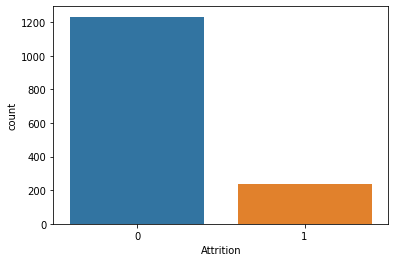

In [25]:
import seaborn as sns
%matplotlib inline  
sns.countplot(data=df,x="Attrition")

**Perform cross validation**

In [41]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

print(df.shape)
df.describe().transpose()

(1470, 35)


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.00,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.00,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.00,2.0,3.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

x1 = df.drop('Attrition', axis=1).values 
y1 = df['Attrition'].values

**DECISION TREE**

Mean Accuracy: 0.6788505747126437
Summary table for metrics:                precision    recall  f1-score   support

           0       0.94      0.70      0.80       258
           1       0.25      0.69      0.36        36

    accuracy                           0.70       294
   macro avg       0.59      0.70      0.58       294
weighted avg       0.86      0.70      0.75       294



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


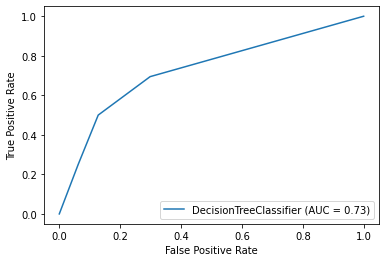

In [43]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report




# train\test split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)


skfold = StratifiedKFold(n_splits=10, random_state=100)
# Decision Tree Classifier
decisionTree_clf = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=2,class_weight='balanced')

# Training of the classifier
decisionTree_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
scores = cross_validate(decisionTree_clf, X_test, y_test, cv=skfold)


y_predictions=decisionTree_clf.predict(X_test)
# Classifier's accuracy
print("Mean Accuracy:", scores['test_score'].mean())

print("Summary table for metrics: ",classification_report(y_test, y_predictions))


plot_roc_curve(decisionTree_clf, X_test, y_test)
plt.show() 

**RANDOM FOREST**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean accuracy: 0.8058620689655172
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       253
           1       0.31      0.66      0.43        41

    accuracy                           0.75       294
   macro avg       0.62      0.71      0.63       294
weighted avg       0.85      0.75      0.78       294



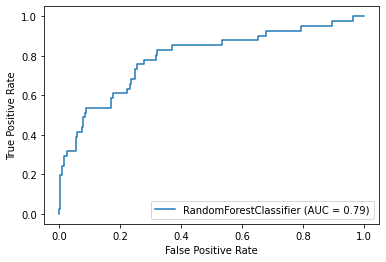

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve




# train/test split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)


skfold = StratifiedKFold(n_splits=10, random_state=100)
# Random forest classifier
randomForest_clf = RandomForestClassifier(criterion="gini", random_state=100, max_depth=2,class_weight='balanced_subsample')

#Training Decision Tree
randomForest_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
scores1 = cross_validate(randomForest_clf, X_test, y_test, cv=skfold)


y_prediction=randomForest_clf.predict(X_test)
#Result

print("Mean accuracy:", scores1['test_score'].mean())

print(classification_report(y_test, y_prediction))


plot_roc_curve(randomForest_clf, X_test, y_test)
plt.show() 

**Partition of the dataset into 10 bins keeping the initial ratio**

In [45]:
from sklearn.preprocessing import StandardScaler

# seperation of classes
df_0=df[df['Attrition']==0]
df_1=df[df['Attrition']==1]

#Countig length of each class data

ln0=int(len(df_0)/10)
ln1=int(len(df_1)/10)

init0=0
init1=0

bins=[]

#original Imbalance
orig_imbalance=(labels_total[0]/(labels_total[1]+labels_total[0]))*100
print("Original Imbalance in the dataset: {} %".format(orig_imbalance))

#Creating 10 bins keeping imbalance percentage as original
for i in range(10):
    curr_bin=pd.concat([df_0.iloc[init0:init0+ln0,:],df_1.iloc[init1:init1+ln1,:]])
    total_lbs=curr_bin.Attrition.value_counts()
    imbalance=(total_lbs[0]/(total_lbs[0]+total_lbs[1]))*100
    print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
    bins.append(curr_bin.values)
    init0+=ln0
    init1+=ln1


# Preprocessing 9 Bins data as X_train and curr_bin as X_test
bin9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining 9 bins data
data=pd.DataFrame(bin9)
data.columns=df.columns

X_train=data.iloc[:,1:9]
y_train=data.iloc[:,9:11]
X_test=curr_bin.iloc[:,1:9]
y_test=curr_bin.iloc[:,9:11]

# standardised data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# applying PCA for two components that capture most variance of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

Original Imbalance in the dataset: 83.87755102040816 %
Class imbalance ratio in bin 0 : 84.24657534246576 %
Class imbalance ratio in bin 1 : 84.24657534246576 %
Class imbalance ratio in bin 2 : 84.24657534246576 %
Class imbalance ratio in bin 3 : 84.24657534246576 %
Class imbalance ratio in bin 4 : 84.24657534246576 %
Class imbalance ratio in bin 5 : 84.24657534246576 %
Class imbalance ratio in bin 6 : 84.24657534246576 %
Class imbalance ratio in bin 7 : 84.24657534246576 %
Class imbalance ratio in bin 8 : 84.24657534246576 %
Class imbalance ratio in bin 9 : 84.24657534246576 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


**ELBOW METHOD**

Text(0, 0.5, 'Total within-cluster sum of squares')

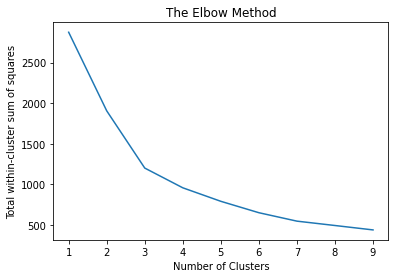

In [46]:
twss=[]
sa=[]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(X_train_pca)
    Ypreds=kmeans.predict(X_train_pca)
    twss.append(kmeans.inertia_)
    if i>1:
        sa.append(silhouette_score(X_train_pca, Ypreds))

plt.plot(range(1,10),twss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')

**SILHUETEE ANALYSIS**

Para n_clusters = 2 O score_silhouette médio é : 0.34244859285372425
Para n_clusters = 3 O score_silhouette médio é : 0.3631864502088145
Para n_clusters = 4 O score_silhouette médio é : 0.32902541248463785
Para n_clusters = 5 O score_silhouette médio é : 0.32816582098867586
Para n_clusters = 6 O score_silhouette médio é : 0.3491252086144529


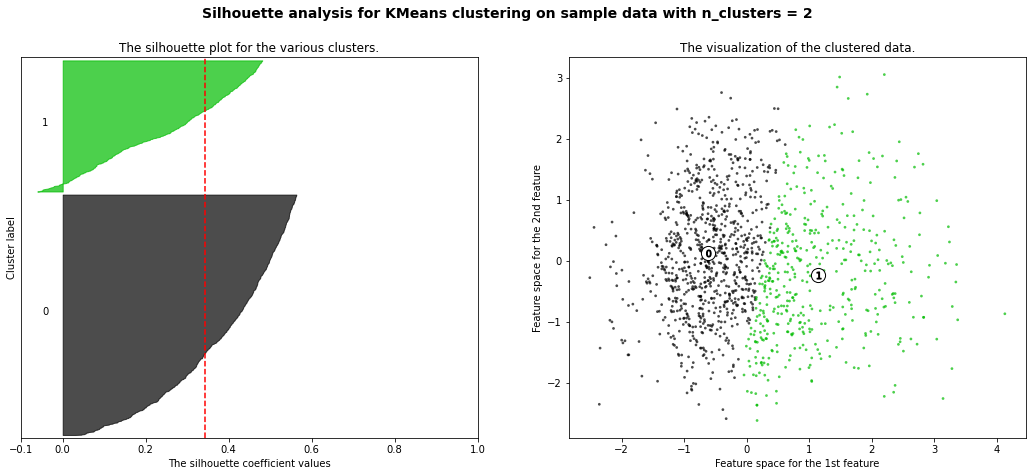

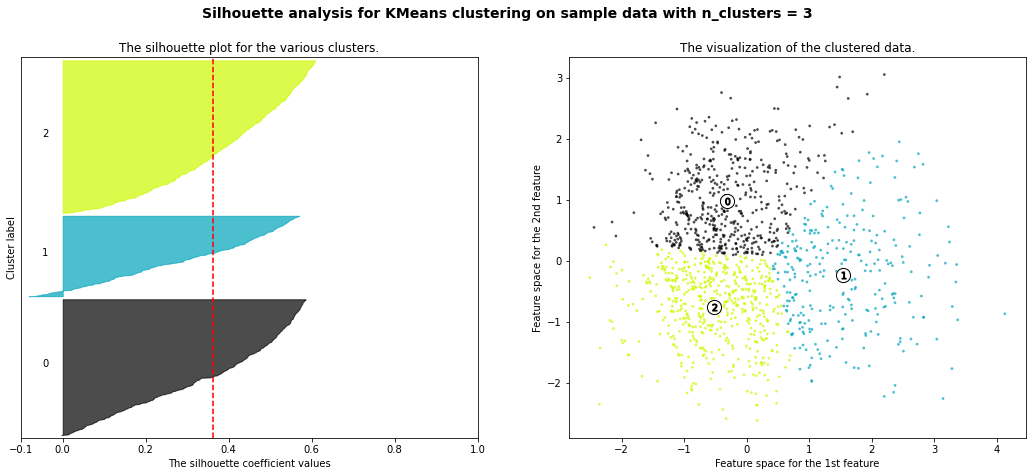

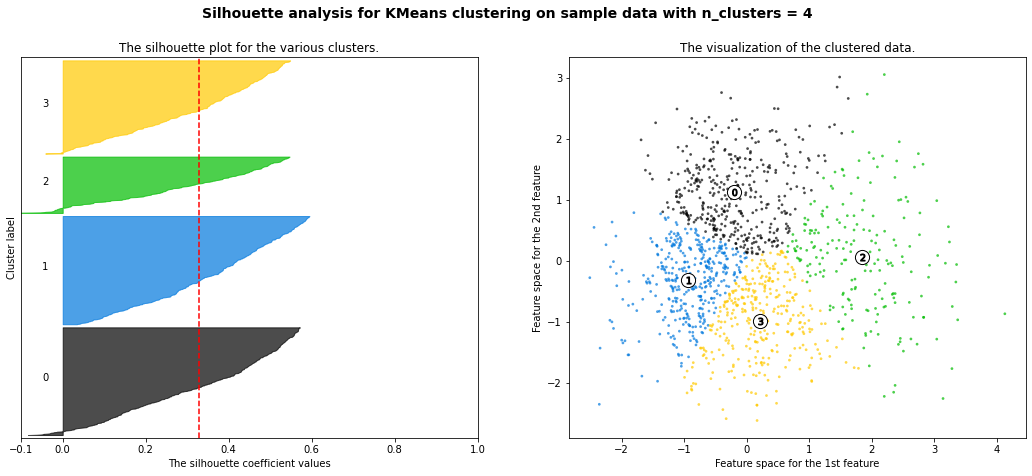

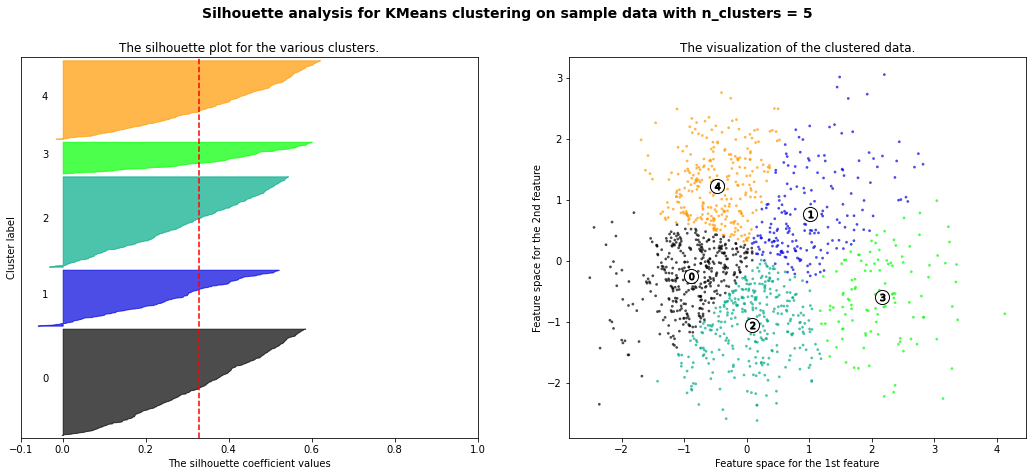

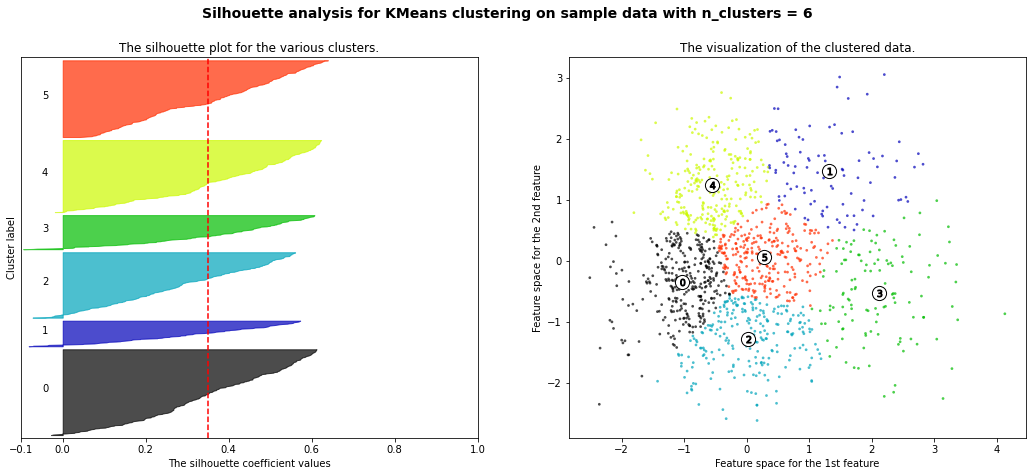

In [47]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_pca) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_pca)
# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "O score_silhouette médio é :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_pca, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,       alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

**RUN K-MEANS**

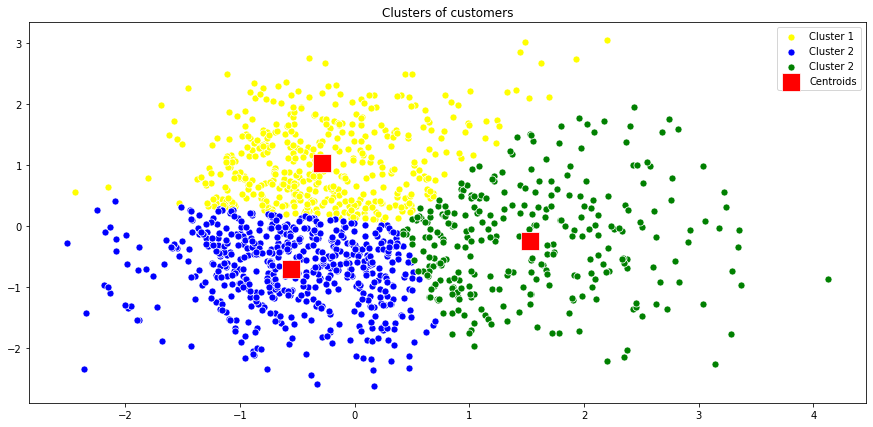

In [49]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train_pca)

# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X_train_pca[y_kmeans == 0, 0], X_train_pca[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X_train_pca[y_kmeans == 1, 0], X_train_pca[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X_train_pca[y_kmeans == 2, 0], X_train_pca[y_kmeans == 2, 1], color = 'green', label = 'Cluster 2',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')

plt.legend()
plt.show()

**For each cluster identify its centroid and the number of samples of the minority class in that cluster**

In [50]:
clr_dt=data

#cols=list(cluster_data.columns)
clr_dt["Cluster label"]=kmeans.labels_


clr_in = pd.DataFrame()

clr_in=pd.DataFrame(columns=["Centroid","Cluster label","Min_cluster1","Max_cluster0"])

for i in clr_dt["Cluster label"].unique():
    count1=np.sum(clr_dt[(clr_dt['Attrition']==1) & (clr_dt["Cluster label"]==i)].count().unique())
    count0=np.sum(clr_dt[(clr_dt['Attrition']==0) & (clr_dt["Cluster label"]==i)].count().unique())
    center=kmeans.cluster_centers_[i]
    clr_in = clr_in.append(pd.Series(data={'Centroid':center,'Cluster label':i, 'Min_cluster1':count1, 'Max_cluster0':count0}), ignore_index=True)


#clr_in

,Centroid,Cluster label,Min_cluster1,Max_cluster0
0,"[-0.5536599515716397, -0.7051632939479733]",1,8,560
1,"[-0.2822460974336949, 1.0310720397656523]",0,17,439
2,"[1.528217492836055, -0.24012447989892782]",2,182,108


**Train a random forest for each of the clusters that contains samples from more than one class**

In [5]:
from sklearn.metrics import accuracy_score as acc
from statistics import *

Two_cls_info=clr_in[(clr_in['Min_cluster1']>0) & (clr_in['Max_cluster0']>0)]
Two_cls_labels=Two_cls_info['Cluster label']
Two_cls_data=pd.DataFrame()
Two_cls_data.dropna
for i in Two_cls_labels:
  df=clr_dt[clr_dt['Cluster label']==i]
  Two_cls_data=Two_cls_data.append(df)

#random forest classifier 
randomForest_clf =RandomForestClassifier(n_estimators=100, min_samples_split=10,random_state=50)

#empty list for the scores
score=[]

# train/test data needed
X_train, X_test, y_train, y_test = train_test_split(Two_cls_data.iloc[:,1:len(Two_cls_data.columns)-2], Two_cls_data.iloc[:,len(Two_cls_data.columns)-2:len(Two_cls_data.columns)-1], test_size=0.2)

#fitting the classifier
randomForest_clf.fit(X_train,y_train)

y_pred=randomForest_clf.predict(X_test)
y_tr=y_test
score.append(acc(y_tr,y_pred))
print("Score for Random Forest  is:{:.3f}".format(mean(score)) )

#plot
#plot_roc_curve(randomForest_clf, X_test, y_test)
#plt.show()

NameError: ignored

**Assign x from the unseen fold to its closest cluster and If this cluster has only instances of one class, assign to x that label**

In [0]:
#If cluster has only one instance of class then label will be that class itself
clr_in['new_label']=np.where(clr_in['Max_cluster0']>clr_in['Min_cluster1'],0,1)

#Copying cluster_info to cluster_info_new and adding 'New_label' column with modified labels

clr_in_new=clr_in
n_clusters=2
#X_test_labels contain assignment of labels on base of elucdian distance from centroids
X_test_labels=np.zeros(X_test_pca.shape[0])
for i in range(len(X_test_pca)):
  min_dis=10000
  for j in range(n_clusters-2):
    if np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])<min_dis:
      min_dis=np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])
      X_test_labels[i]=clr_in_new['new_label'][j]

curr_bin["Cluster lable"]=X_test_labels
curr_bin["Cluster lable"] = curr_bin["Cluster lable"].astype(int)

**Method to find out cluster label of left out fold**

In [56]:
def cluster_to_label(a):
    if a == 0:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 1:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 2:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 3:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 4:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 5:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 6:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])
    if a == 7:
        return int(clr_in[clr_in['Cluster label']==a]['new_label'])

prd=kmeans.fit_predict(X_test_pca)
labels_ = prd
curr_bin['cluster_label']=labels_
curr_bin['class_label']=curr_bin['cluster_label'].apply(cluster_to_label)



print(pd.crosstab(curr_bin['Attrition'],curr_bin['class_label']))
print("Accuracy: " ,acc(curr_bin['class_label'],curr_bin['Attrition']))

class_label    0   1
Attrition           
0            106  17
1             10  13
Accuracy:  0.815068493150685


**DT and RF model with 10 bin**

Accuracy for Decision Tree: 0.21 
Accuracy for Random Forest: 0.21 
Summary table of metriccs for Decision Tree :
              precision    recall  f1-score   support

         0.0       0.21      1.00      0.35        31
         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00        23
         3.0       0.00      0.00      0.00        20
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         3
         6.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00        20
         8.0       0.00      0.00      0.00        18
         9.0       0.00      0.00      0.00         6
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         3
        12.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         1

    accuracy        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


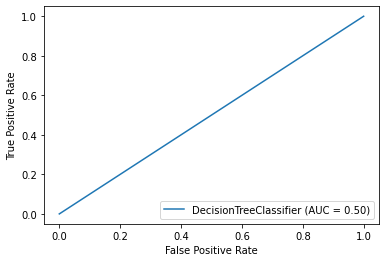

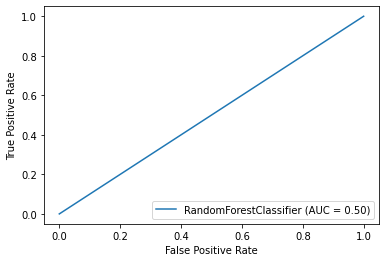

In [57]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score as acc
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score as r2
from sklearn.metrics import roc_auc_score as ras


randomForest_clf =RandomForestClassifier(n_estimators=1000,max_depth=8,criterion='entropy', min_samples_split=100,
                                random_state=100)
decisionTree_clf=DecisionTreeClassifier(min_samples_split=10,max_depth=8,
                                random_state=100)
new_randomForest_score=[]
new_decisionTree_score=[]

init0=0
init1=0

for i in range(10):
    curr_bin=pd.concat([df_0.iloc[init0:init0+ln0,:],df_1.iloc[init1:init1+ln1,:]])
    curr_bin=pd.DataFrame(curr_bin)


# PCA and Scaling of the data
    X_test_bin=curr_bin.iloc[:,1:len(curr_bin.columns)-2]
    X_test_bin=sc.fit_transform(X_test_bin)
    X_test_bin_pca= pca.fit_transform(X_test_bin)
    X_train_bin=x1[i:-1]
    X_train=sc.fit_transform(X_train_bin)
    X_train_pca= pca.fit_transform(X_train_bin)
    X_test_bin=sc.fit_transform(X_test_bin)
    y_train=y1[i:-1]
    y_test_bin=curr_bin.iloc[:,len(curr_bin.columns)-1:len(curr_bin.columns)]

#Fitting both model for current bin    
    decisionTree_clf.fit(X_train_pca,y_train)
    randomForest_clf.fit(X_train_pca,y_train)

#predicting for testing edw
    yrf_pred=randomForest_clf.predict(X_test_bin_pca)
    ydt_pred=decisionTree_clf.predict(X_test_bin_pca)
    y_true=y_test_bin
    new_decisionTree_score.append(acc(y_true,ydt_pred))
    new_randomForest_score.append(acc(y_true,yrf_pred)) 


#accuracies of classifiers
print("Accuracy for Decision Tree: %0.2f " % (mean(new_decisionTree_score)))
print("Accuracy for Random Forest: %0.2f " % (mean(new_randomForest_score)))


#Result
print("Summary table of metriccs for Decision Tree :")

print(classification_report(y_true, ydt_pred))

print("Summary table of metrics for Random Forest:")

print(classification_report(y_true, yrf_pred))

# plot1
plot_roc_curve(decisionTree_clf, X_test_bin_pca, y_test_bin.values.ravel()) 
plt.show()

#plot2
plot_roc_curve(randomForest_clf,X_test_bin_pca, y_test_bin.values.ravel()) 
plt.show()
